In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid")
data_path = Path(r'D:\Prak. Fungsional\modul5\retail_sales_dataset.csv')
df = pd.read_csv(data_path, low_memory=False)

print('Shape:', df.shape)
print('Columns:', list(df.columns))
df.head()

Shape: (198, 9)
Columns: ['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
1,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
2,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
3,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
4,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30


In [14]:
# Pastikan ada kolom 'Total Amount' — jika tidak ada, coba buat dari Quantity * UnitPrice jika tersedia
col_candidates = [c for c in df.columns if c.lower().replace(' ', '') in ('totalamount','total_amount','total','amount')]
if 'Total Amount' in df.columns:
    total_col = 'Total Amount'
elif len(col_candidates) > 0:
    total_col = col_candidates[0]
elif {'Quantity','UnitPrice'}.issubset(df.columns):
    df['Total Amount'] = df['Quantity'] * df['UnitPrice']
    total_col = 'Total Amount'
else:
    # Jika tidak dapat dibuat, coba cari nama alternatif dan cast ke numeric jika mungkin
    possible = [c for c in df.columns if 'price' in c.lower() or 'amount' in c.lower() or 'total' in c.lower()]
    if possible:
        total_col = possible[0]
    else:
        total_col = None

print('Menggunakan kolom total:', total_col)
df_sample = df.copy()
# Pastikan kolom Quantity numeric
if 'Quantity' in df_sample.columns:
    df_sample['Quantity'] = pd.to_numeric(df_sample['Quantity'], errors='coerce')
# Pastikan total numeric
if total_col is not None:
    df_sample[total_col] = pd.to_numeric(df_sample[total_col], errors='coerce')
df_sample[[c for c in ['Quantity', total_col] if c in df_sample.columns]].head()

Menggunakan kolom total: Total Amount


,Quantity,Total Amount
0,3,150
1,2,1000
2,1,30
3,1,500
4,2,100


In [ ]:
sort_by = total_col if total_col is not None else ('Quantity' if 'Quantity' in df_sample.columns else df_sample.columns[0])
df_sorted = df_sample.sort_values(by=sort_by, ascending=False)
print(f'Urutkan berdasarkan: {sort_by} (descending)')
df_sorted.head(10)

Urutkan berdasarkan: Total Amount (descending)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
64,65,2023-12-05,CUST065,Male,51,Electronics,4,500,2000
71,72,2023-05-23,CUST072,Female,20,Electronics,4,500,2000
14,15,2023-01-16,CUST015,Female,42,Electronics,4,500,2000
117,118,2023-05-16,CUST118,Female,30,Electronics,4,500,2000
108,109,2023-10-18,CUST109,Female,34,Electronics,4,500,2000
92,93,2023-07-14,CUST093,Female,35,Beauty,4,500,2000
88,89,2023-10-01,CUST089,Female,55,Electronics,4,500,2000
73,74,2023-11-22,CUST074,Female,18,Beauty,4,500,2000
138,139,2023-12-15,CUST139,Male,36,Beauty,4,500,2000
151,152,2023-02-28,CUST152,Male,43,Electronics,4,500,2000


In [ ]:
if total_col is None or 'Quantity' not in df_sample.columns:
    print('Kolom untuk filter tidak lengkap: Quantity atau Total Amount tidak tersedia setelah pembersihan.')
    filtered = pd.DataFrame(columns=df_sample.columns)
else:
    filtered = df_sample[(df_sample['Quantity'] > 5) & (df_sample[total_col] > 300)]

print('Jumlah baris hasil filter:', len(filtered))
filtered.head(20)

Jumlah baris hasil filter: 0


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount


In [ ]:
drop_candidates = ['Description', 'CustomerID', 'InvoiceDate', 'StockCode', 'Country']
col_to_drop = None
for c in drop_candidates:
    if c in df_sample.drop_columns:
        col_to_drop = 1
        break
if col_to_drop is not None:
    df_dropped = df_sample.drop(columns=[col_to_drop])
    print(f'Menghapus kolom: {col_to_drop}')
else:
    df_dropped = df_sample.copy()
    print('Tidak menemukan kandidat kolom untuk dihapus; tidak ada perubahan.')

df_dropped.head()

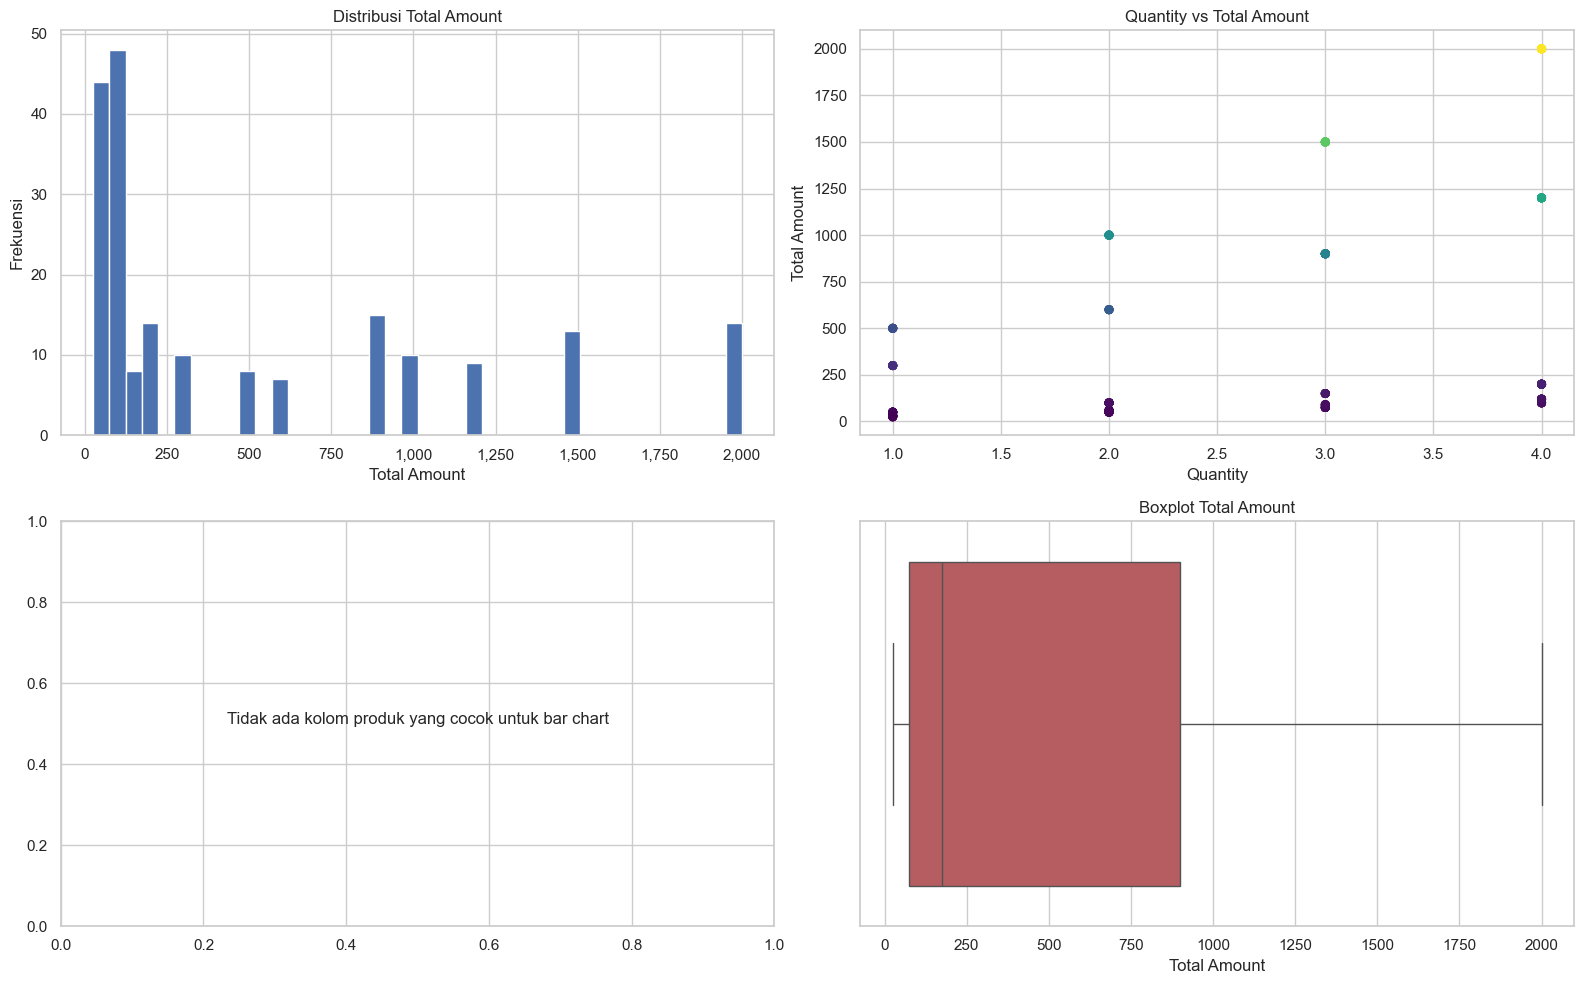

In [27]:
import matplotlib.ticker as mtick
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.ravel()

# Plot 1
if total_col is not None:
    axs[0].hist(df_dropped[total_col].dropna(), bins=40, color='#4C72B0')
    axs[0].set_title('Distribusi Total Amount')
    axs[0].set_xlabel('Total Amount')
    axs[0].set_ylabel('Frekuensi')
    axs[0].xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
else:
    axs[0].text(0.5, 0.5, 'Total Amount tidak tersedia', ha='center')

# Plot 2
if total_col is not None and 'Quantity' in df_dropped.columns:
    sns.scatterplot(data=df_dropped, x='Quantity', y=total_col, ax=axs[1], hue=total_col, palette='viridis', legend=False, edgecolor=None)
    axs[1].set_title('Quantity vs Total Amount')
else:
    axs[1].text(0.5, 0.5, 'Data tidak cukup untuk scatter', ha='center')

# Plot 3: Bar chart
group_col = None
if 'Description' in df.columns:
    group_col = 'Description'
elif 'StockCode' in df.columns:
    group_col = 'StockCode'

if group_col is not None and total_col is not None:
    top_products = df_dropped.groupby(group_col)[total_col].sum().nlargest(10)
    top_products.plot(kind='bar', ax=axs[2], color='#55A868')
    axs[2].set_title('Top 10 Produk berdasarkan Total Amount')
    axs[2].set_ylabel('Total Amount')
    axs[2].tick_params(axis='x', rotation=45)
else:
    axs[2].text(0.5, 0.5, 'Tidak ada kolom produk yang cocok untuk bar chart', ha='center')

# Plot 4: Boxplot
if total_col is not None:
    sns.boxplot(x=df_dropped[total_col].dropna(), ax=axs[3], color='#C44E52')
    axs[3].set_title('Boxplot Total Amount')
else:
    axs[3].axis('off')

plt.tight_layout()
plt.show()